In [1]:
# LA County: Education Levels by Census Tract
# Author: Katrina Deloso
# In this analysis, I will use data from Census Reporter to map out the percentage of each census tract that have attained different levels of education. The education levels begin at 5th grade and end at PhD. Knowing that education level is positively correlated to park access in LA, I wanted to examine which census tracts are, on average, more highly education. We can overlay this map then over a base map to show whether the more highly educated census tracts do in fact have greater access to green space.

In [2]:
# First, I import several data sets to analyze data (both general data and spatial data), provide basemaps, and support plots
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [37]:
# Next, I need to import the data set. I pulled data from the Census Reporter website, looking at highest level of education attained, sorted by census tract
gdf = gpd.read_file('acs2019_5yr_B15003_14000US06037534001.geojson')

In [38]:
# I use .shape to know how many rows and columns (rows, columns) the dataframe has
# I learn that there are 2347 rows and 53 columns
gdf.shape

(2347, 53)

In [39]:
gdf.head()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",B15003005,"B15003005, Error",B15003006,"B15003006, Error",B15003007,"B15003007, Error",B15003008,"B15003008, Error",B15003009,"B15003009, Error",B15003010,"B15003010, Error",B15003011,"B15003011, Error",B15003012,"B15003012, Error",B15003013,"B15003013, Error",B15003014,"B15003014, Error",B15003015,"B15003015, Error",B15003016,"B15003016, Error",B15003017,"B15003017, Error",B15003018,"B15003018, Error",B15003019,"B15003019, Error",B15003020,"B15003020, Error",B15003021,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
0,05000US06037,"Los Angeles County, CA",6886895.0,0.0,242811.0,4154.0,2187.0,279.0,3038.0,365.0,12811.0,803.0,29642.0,1206.0,63894.0,2119.0,37551.0,1414.0,51315.0,1874.0,269291.0,4609.0,41314.0,1319.0,90436.0,2684.0,175271.0,3769.0,87658.0,1893.0,132062.0,3041.0,197778.0,3825.0,1296682.0,10732.0,122767.0,3002.0,305982.0,5398.0,1001003.0,7327.0,482323.0,4839.0,1460862.0,8827.0,522777.0,6155.0,165612.0,3221.0,91828.0,2090.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,312.0,85.0,71.0,6.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,6.0,9.0,3.0,6.0,26.0,33.0,24.0,36.0,0.0,12.0,7.0,13.0,131.0,114.0,44.0,42.0,52.0,47.0,89.0,55.0,711.0,165.0,39.0,41.0,228.0,82.0,660.0,213.0,278.0,95.0,486.0,118.0,120.0,62.0,63.0,56.0,60.0,38.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,228.0,1.0,3.0,0.0,12.0,2.0,4.0,0.0,12.0,0.0,12.0,38.0,51.0,0.0,12.0,0.0,12.0,21.0,30.0,59.0,50.0,7.0,12.0,0.0,12.0,11.0,18.0,9.0,13.0,16.0,19.0,650.0,215.0,77.0,46.0,151.0,71.0,495.0,97.0,277.0,82.0,511.0,157.0,257.0,96.0,0.0,12.0,105.0,65.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,363.0,245.0,140.0,0.0,17.0,0.0,17.0,0.0,17.0,31.0,49.0,0.0,17.0,34.0,53.0,54.0,87.0,101.0,90.0,0.0,17.0,24.0,32.0,30.0,45.0,93.0,99.0,31.0,29.0,34.0,41.0,906.0,233.0,90.0,59.0,265.0,109.0,850.0,207.0,449.0,190.0,694.0,195.0,207.0,124.0,34.0,31.0,44.0,38.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,195.0,148.0,70.0,0.0,12.0,0.0,12.0,0.0,12.0,20.0,31.0,24.0,26.0,0.0,12.0,31.0,35.0,26.0,26.0,17.0,26.0,10.0,15.0,5.0,8.0,93.0,64.0,50.0,34.0,103.0,59.0,678.0,171.0,46.0,33.0,107.0,48.0,470.0,141.0,197.0,71.0,404.0,104.0,170.0,84.0,20.0,21.0,27.0,30.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [40]:
# Next, I need to make sure that I can see all rows and columns by scrolling (since jupyter hides the middle ones by default)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
# Check to make sure my last action worked
gdf.head()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",B15003005,"B15003005, Error",B15003006,"B15003006, Error",B15003007,"B15003007, Error",B15003008,"B15003008, Error",B15003009,"B15003009, Error",B15003010,"B15003010, Error",B15003011,"B15003011, Error",B15003012,"B15003012, Error",B15003013,"B15003013, Error",B15003014,"B15003014, Error",B15003015,"B15003015, Error",B15003016,"B15003016, Error",B15003017,"B15003017, Error",B15003018,"B15003018, Error",B15003019,"B15003019, Error",B15003020,"B15003020, Error",B15003021,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
0,05000US06037,"Los Angeles County, CA",6886895.0,0.0,242811.0,4154.0,2187.0,279.0,3038.0,365.0,12811.0,803.0,29642.0,1206.0,63894.0,2119.0,37551.0,1414.0,51315.0,1874.0,269291.0,4609.0,41314.0,1319.0,90436.0,2684.0,175271.0,3769.0,87658.0,1893.0,132062.0,3041.0,197778.0,3825.0,1296682.0,10732.0,122767.0,3002.0,305982.0,5398.0,1001003.0,7327.0,482323.0,4839.0,1460862.0,8827.0,522777.0,6155.0,165612.0,3221.0,91828.0,2090.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,312.0,85.0,71.0,6.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,6.0,9.0,3.0,6.0,26.0,33.0,24.0,36.0,0.0,12.0,7.0,13.0,131.0,114.0,44.0,42.0,52.0,47.0,89.0,55.0,711.0,165.0,39.0,41.0,228.0,82.0,660.0,213.0,278.0,95.0,486.0,118.0,120.0,62.0,63.0,56.0,60.0,38.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,228.0,1.0,3.0,0.0,12.0,2.0,4.0,0.0,12.0,0.0,12.0,38.0,51.0,0.0,12.0,0.0,12.0,21.0,30.0,59.0,50.0,7.0,12.0,0.0,12.0,11.0,18.0,9.0,13.0,16.0,19.0,650.0,215.0,77.0,46.0,151.0,71.0,495.0,97.0,277.0,82.0,511.0,157.0,257.0,96.0,0.0,12.0,105.0,65.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,363.0,245.0,140.0,0.0,17.0,0.0,17.0,0.0,17.0,31.0,49.0,0.0,17.0,34.0,53.0,54.0,87.0,101.0,90.0,0.0,17.0,24.0,32.0,30.0,45.0,93.0,99.0,31.0,29.0,34.0,41.0,906.0,233.0,90.0,59.0,265.0,109.0,850.0,207.0,449.0,190.0,694.0,195.0,207.0,124.0,34.0,31.0,44.0,38.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,195.0,148.0,70.0,0.0,12.0,0.0,12.0,0.0,12.0,20.0,31.0,24.0,26.0,0.0,12.0,31.0,35.0,26.0,26.0,17.0,26.0,10.0,15.0,5.0,8.0,93.0,64.0,50.0,34.0,103.0,59.0,678.0,171.0,46.0,33.0,107.0,48.0,470.0,141.0,197.0,71.0,404.0,104.0,170.0,84.0,20.0,21.0,27.0,30.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [42]:
# By using .info, we can see that the first row (row 0) refers not to a census tract, but to LA County as a whole.
gdf.info

<bound method DataFrame.info of                    geoid                                   name  B15003001  \
0           05000US06037                 Los Angeles County, CA  6886895.0   
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   
5     14000US06037101300     Census Tract 1013, Los Angeles, CA     3263.0   
6     14000US06037101400     Census Tract 1014, Los Angeles, CA     2645.0   
7     14000US06037102103  Census Tract 1021.03, Los Angeles, CA     1378.0   
8     14000US06037102104  Census Tract 1021.04, Los Angeles, CA     2752.0   
9     14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1373.0   
10    14000US06037102107  Census Tract 1021.07, Los Angeles, CA     3280.0   
11    14000US06037103101  Census

In [43]:
# Additionally, by using .info(), we can look at the types of data (ex. float, object, geometry)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B15003001         2347 non-null   float64 
 3   B15003001, Error  2347 non-null   float64 
 4   B15003002         2347 non-null   float64 
 5   B15003002, Error  2347 non-null   float64 
 6   B15003003         2347 non-null   float64 
 7   B15003003, Error  2347 non-null   float64 
 8   B15003004         2347 non-null   float64 
 9   B15003004, Error  2347 non-null   float64 
 10  B15003005         2347 non-null   float64 
 11  B15003005, Error  2347 non-null   float64 
 12  B15003006         2347 non-null   float64 
 13  B15003006, Error  2347 non-null   float64 
 14  B15003007         2347 non-null   float64 
 15  B15003007, Error  2347 non-null   float64 
 16  B15003008       

In [44]:
# Since row 0 refers to LA County but not a specific census tract, I need to drop that row so that it doesn't confuse my analysis
# I do this using .drop[(row)], and then redefine that new set as gdf again to avoid confusion
gdf = gdf.drop([0])

In [46]:
# I need to change the column headers so that I can understand what they're actually referring to. First, I get a list of the current headers
list(gdf)

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

In [47]:
# This makes me realize I have WAY too many columns. I need to get rid of the margin of error columns.
columns_to_keep = ['geoid',
 'name',
'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']
gdf = gdf[columns_to_keep]

In [52]:
# I decide to just drop the first few columns, from no school through 4th grade.
columns_to_keep = ['geoid',
 'name',
'B15003001',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']
gdf = gdf[columns_to_keep]

In [53]:
# Next, I name my long list of columns with the headers in the metadata
# I change the headers from "Bachelor's degree" to just "Bachelors degree" since the apostrophe interferes with the function
gdf.columns = ['geoid',
'name', 
'Total',
 '5th grade',
 '6th grade',
 '7th grade',
 '8th grade',
 '9th grade',
 '10th grade',
 '11th grade',
 '12th grade, no diploma',
 'Regular high school diploma',
 'GED or alternative credential',
 'Some college, less than 1 year',
 'Some college, 1 or more years, no degree',
 'Bachelors degree',
 'Associates degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'geometry']

In [54]:
# Another quick check
gdf.head()

,geoid,name,Total,5th grade,6th grade,7th grade,8th grade,9th grade,10th grade,11th grade,"12th grade, no diploma",Regular high school diploma,GED or alternative credential,"Some college, less than 1 year","Some college, 1 or more years, no degree",Bachelors degree,Associates degree,Masters degree,Professional school degree,Doctorate degree,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,26.0,24.0,0.0,7.0,131.0,44.0,52.0,89.0,711.0,39.0,228.0,660.0,278.0,486.0,120.0,63.0,60.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,0.0,21.0,59.0,7.0,0.0,11.0,9.0,16.0,650.0,77.0,151.0,495.0,277.0,511.0,257.0,0.0,105.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,54.0,101.0,0.0,24.0,30.0,93.0,31.0,34.0,906.0,90.0,265.0,850.0,449.0,694.0,207.0,34.0,44.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,31.0,26.0,17.0,10.0,5.0,93.0,50.0,103.0,678.0,46.0,107.0,470.0,197.0,404.0,170.0,20.0,27.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,0.0,28.0,32.0,0.0,0.0,34.0,84.0,63.0,772.0,80.0,185.0,537.0,336.0,519.0,342.0,109.0,49.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [55]:
gdf['No HS'] =  gdf['5th grade']+gdf['6th grade']+gdf['7th grade']+ gdf['8th grade']+gdf['9th grade']+gdf['10th grade']+gdf['11th grade']+gdf['12th grade, no diploma']


In [57]:
gdf['HS Degree/Diploma'] = gdf['Regular high school diploma']+ gdf['GED or alternative credential']

In [58]:
gdf['Some college, no Bachelors'] = gdf['Some college, less than 1 year'] + gdf['Some college, 1 or more years, no degree'] + gdf['Associates degree']

In [59]:
gdf['Graduate Degree (incl Masters and PhD)'] = gdf['Masters degree'] + gdf['Professional school degree'] + gdf['Doctorate degree']

In [60]:
gdf.head()

,geoid,name,Total,5th grade,6th grade,7th grade,8th grade,9th grade,10th grade,11th grade,"12th grade, no diploma",Regular high school diploma,GED or alternative credential,"Some college, less than 1 year","Some college, 1 or more years, no degree",Bachelors degree,Associates degree,Masters degree,Professional school degree,Doctorate degree,geometry,No HS,HS Degree/Diploma,"Some college, no Bachelors",Graduate Degree (incl Masters and PhD)
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,26.0,24.0,0.0,7.0,131.0,44.0,52.0,89.0,711.0,39.0,228.0,660.0,278.0,486.0,120.0,63.0,60.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",373.0,750.0,1374.0,243.0
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,0.0,21.0,59.0,7.0,0.0,11.0,9.0,16.0,650.0,77.0,151.0,495.0,277.0,511.0,257.0,0.0,105.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",123.0,727.0,1157.0,362.0
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,54.0,101.0,0.0,24.0,30.0,93.0,31.0,34.0,906.0,90.0,265.0,850.0,449.0,694.0,207.0,34.0,44.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",367.0,996.0,1809.0,285.0
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,31.0,26.0,17.0,10.0,5.0,93.0,50.0,103.0,678.0,46.0,107.0,470.0,197.0,404.0,170.0,20.0,27.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",335.0,724.0,981.0,217.0
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,0.0,28.0,32.0,0.0,0.0,34.0,84.0,63.0,772.0,80.0,185.0,537.0,336.0,519.0,342.0,109.0,49.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",241.0,852.0,1241.0,500.0


In [61]:
collapsed_columns = ['geoid',
 'name',
 'Total',
 'No HS',
 'HS Degree/Diploma',
 'Some college, no Bachelors',
 'Bachelors degree',
 'Graduate Degree (incl Masters and PhD)',
 'geometry']
gdf = gdf[collapsed_columns]

In [62]:
gdf.head()

,geoid,name,Total,No HS,HS Degree/Diploma,"Some college, no Bachelors",Bachelors degree,Graduate Degree (incl Masters and PhD),geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,373.0,750.0,1374.0,278.0,243.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,123.0,727.0,1157.0,277.0,362.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,367.0,996.0,1809.0,449.0,285.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,335.0,724.0,981.0,197.0,217.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,241.0,852.0,1241.0,336.0,500.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [63]:
# Now I want to sort by most populous census tract (descending order of values)
gdf_sorted = gdf.sort_values(by='Total',ascending = False)
gdf_sorted[['geoid','Total']].head(10)

,geoid,Total
923,14000US06037275602,9145.0
2147,14000US06037702901,8133.0
2198,14000US06037901004,8017.0
2206,14000US06037901205,7098.0
994,14000US06037300600,7044.0
532,14000US06037206020,6889.0
2107,14000US06037700200,6781.0
2236,14000US06037910705,6519.0
1938,14000US06037577603,6346.0
1844,14000US06037571200,6328.0


In [64]:
# I can also look to see which census tracts have the greatest number of Graduate Degrees
gdf_sorted = gdf.sort_values(by='Graduate Degree (incl Masters and PhD)',ascending = False)
gdf_sorted[['geoid','Graduate Degree (incl Masters and PhD)']].head(10)

,geoid,Graduate Degree (incl Masters and PhD)
923,14000US06037275602,3299.0
860,14000US06037267200,2162.0
1403,14000US06037480600,2148.0
1389,14000US06037464100,2099.0
1093,14000US06037401800,1987.0
2123,14000US06037701304,1884.0
1382,14000US06037463500,1846.0
2148,14000US06037703001,1839.0
1095,14000US06037401902,1815.0
1938,14000US06037577603,1811.0


Text(0.5, 1.0, 'Tracts with the greatest number of Graduate degrees')

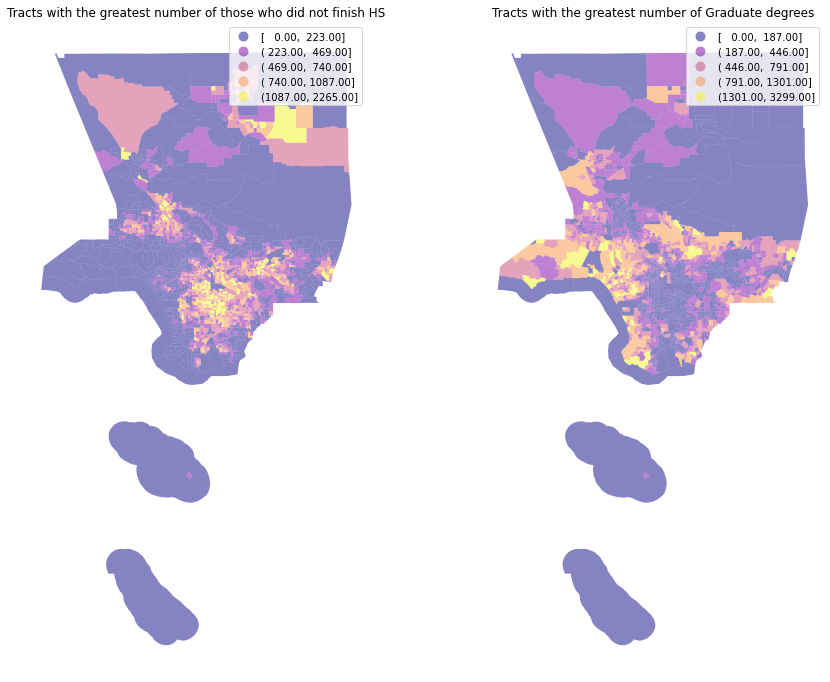

In [72]:
# I make side by side graphs to compare where the greatest number of grad degrees vs those who did not finish high school live

# create the 1x2 subplots: 1 row with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

#left map
gdf.plot(column='No HS',  
            cmap='plasma',
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.5, 
            ax=ax1, # this assigns the map to the subplot - ax=ax1 puts it on the left
            legend=True
           )

ax1.axis("off")
ax1.set_title("Tracts with the greatest number of those who did not finish HS")

# right map
gdf.plot(column='Graduate Degree (incl Masters and PhD)', 
            cmap='plasma',
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.5, 
            ax=ax2, # this assigns the map to the subplot - ax=ax2 puts it on the right
            legend=True
           )

ax2.axis("off")
ax2.set_title("Tracts with the greatest number of Graduate degrees")

In [73]:
# It's finally time to normalize the data by turning it into percentages
gdf['Percent No HS'] = gdf['No HS']/gdf['Total']*100
gdf['Percent HS Degree/Diploma'] = gdf['HS Degree/Diploma']/gdf['Total']*100
gdf['Percent Some college, no Bachelors'] = gdf['Some college, no Bachelors']/gdf['Total']*100
gdf['Percent Bachelors degree'] = gdf['Bachelors degree']/gdf['Total']*100
gdf['Percent Graduate Degree (incl Masters and PhD)'] = gdf['Graduate Degree (incl Masters and PhD)']/gdf['Total']*100

In [74]:
# Check to make sure this worked
gdf.head()

,geoid,name,Total,No HS,HS Degree/Diploma,"Some college, no Bachelors",Bachelors degree,Graduate Degree (incl Masters and PhD),geometry,Percent No HS,Percent HS Degree/Diploma,"Percent Some college, no Bachelors",Percent Bachelors degree,Percent Graduate Degree (incl Masters and PhD)
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,373.0,750.0,1374.0,278.0,243.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",11.962797,24.053881,44.066709,8.915972,7.793457
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,123.0,727.0,1157.0,277.0,362.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4.577596,27.056197,43.059174,10.308895,13.472274
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,367.0,996.0,1809.0,449.0,285.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",8.704934,23.624288,42.907970,10.649905,6.759962
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,335.0,724.0,981.0,197.0,217.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",12.660620,27.362056,37.074830,7.445200,8.201058
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,241.0,852.0,1241.0,336.0,500.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",7.385841,26.110941,38.032485,10.297272,15.323322


Text(0.5, 1.0, 'Tracts with the greatest rate of graduate degrees')

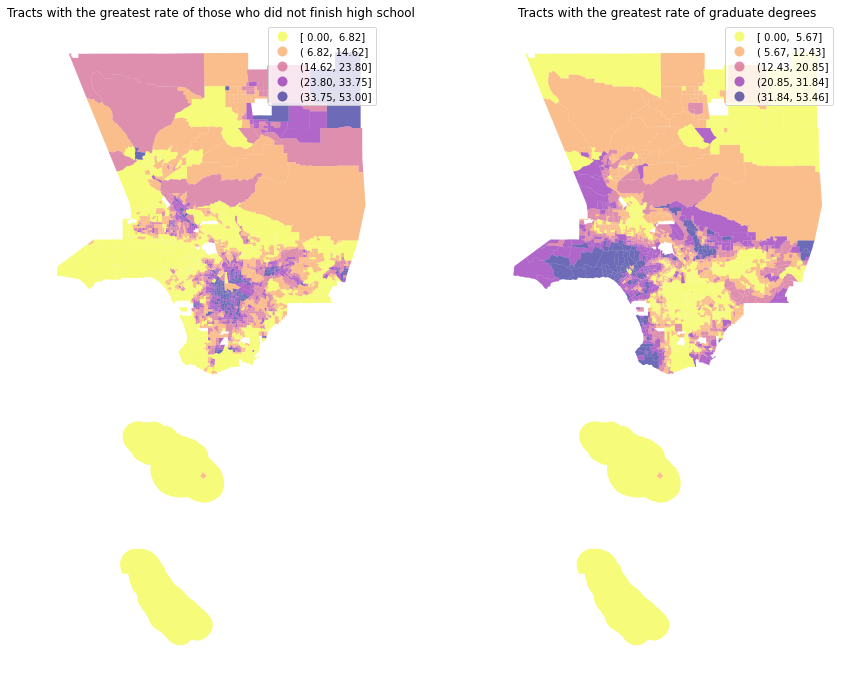

In [79]:
# I make side by side graphs to compare where the greatest number of grad degrees vs those who did not finish high school live

# create the 1x2 subplots: 1 row with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

#left map
gdf.plot(column='Percent No HS',  
            cmap='plasma_r',
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.6, 
            ax=ax1, # this assigns the map to the subplot - ax=ax1 puts it on the left
            legend=True
           )

ax1.axis("off")
ax1.set_title("Tracts with the greatest rate of those who did not finish high school")

# right map
gdf.plot(column='Percent Graduate Degree (incl Masters and PhD)', 
            cmap='plasma_r',
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.6, 
            ax=ax2, # this assigns the map to the subplot - ax=ax2 puts it on the right
            legend=True
           )

ax2.axis("off")
ax2.set_title("Tracts with the greatest rate of graduate degrees")